# Project Overview



##### The project analyzes world development indicators using data from the official World Bank database. Key metrics such as population, GDP, and Human Development Index (HDI) are explored to assess global and regional development trends. The analysis aims to provide insights into economic growth, population dynamics, and quality of life across different countries and regions from 2000 to 2022.



## Section 1: Prepare & QA the data 

 

In [495]:
import pandas as pd
import numpy as np


In [496]:
data = pd.read_excel('/Users/MazarElzain/Desktop/World Bank Data/World Development Indicators.xlsx')
data

,Country,Country Code,Year,Population,GDP,GDP per Captia,Human Development Index (HDI) 2022
0,Afghanistan,AFG,2022,41128771,14502158192.090395,352.603733,0.462
1,Albania,ALB,2022,2777689,18916378860.548828,6810.114041,0.789
2,Algeria,DZA,2022,44903225,225560256621.757202,5023.252932,0.745
3,American Samoa,ASM,2022,44273,871000000,19673.390102,0.000
4,Andorra,AND,2022,79824,3380602042.842834,42350.697069,0.884
...,...,...,...,...,...,...,...
4986,Virgin Islands (U.S.),VIR,2000,108642,..,..,0.000
4987,West Bank and Gaza,PSE,2000,2922153,4313600000,1476.17185,0.000
4988,"Yemen, Rep.",YEM,2000,18628700,9679316770.186335,519.591639,0.380
4989,Zambia,ZMB,2000,9891136,3600632111.414137,364.026145,0.569


In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             4991 non-null   object 
 1   Country Code                        4991 non-null   object 
 2   Year                                4991 non-null   int64  
 3   Population                          4991 non-null   int64  
 4   GDP                                 4991 non-null   object 
 5   GDP per Captia                      4991 non-null   object 
 6   Human Development Index (HDI) 2022  4991 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 273.1+ KB


In [498]:
data.describe()

,Year,Population,Human Development Index (HDI) 2022
count,4991.000000,4.991000e+03,4991.000000
mean,2011.000000,3.242869e+07,0.628230
std,6.633914,1.293025e+08,0.287302
min,2000.000000,9.609000e+03,0.000000
25%,2005.000000,7.132585e+05,0.517000
50%,2011.000000,5.683334e+06,0.723000
75%,2017.000000,2.073469e+07,0.823000
max,2022.000000,1.417173e+09,0.967000


In [499]:
data = data.rename(columns={'GDP': 'GDP (USD)', 'GDP per Captia': 'GDP per Capita (USD)'})
data.head(20)

,Country,Country Code,Year,Population,GDP (USD),GDP per Capita (USD),Human Development Index (HDI) 2022
0,Afghanistan,AFG,2022,41128771,14502158192.090395,352.603733,0.462
1,Albania,ALB,2022,2777689,18916378860.548828,6810.114041,0.789
2,Algeria,DZA,2022,44903225,225560256621.757202,5023.252932,0.745
3,American Samoa,ASM,2022,44273,871000000,19673.390102,0.000
4,Andorra,AND,2022,79824,3380602042.842834,42350.697069,0.884
5,Angola,AGO,2022,35588987,104399746853.401413,2933.484644,0.591
6,Antigua and Barbuda,ATG,2022,93763,1867733333.333333,19919.726687,0.826
7,Argentina,ARG,2022,46234830,631133384439.944458,13650.604629,0.849
8,Armenia,ARM,2022,2780469,19513474648.242935,7018.051504,0.786
9,Aruba,ABW,2022,106445,3544707788.056643,33300.838819,0.000


In [500]:
region = pd.read_excel('/Users/MazarElzain/Desktop/World Bank Data/ISO_region.xlsx')
region.head()

,alpha-3,region
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [501]:
# Joining tables to add the region column

merged_data = pd.merge(data, region, left_on='Country Code', right_on='alpha-3', how='left')
merged_data

,Country,Country Code,Year,Population,GDP (USD),GDP per Capita (USD),Human Development Index (HDI) 2022,alpha-3,region
0,Afghanistan,AFG,2022,41128771,14502158192.090395,352.603733,0.462,AFG,Asia
1,Albania,ALB,2022,2777689,18916378860.548828,6810.114041,0.789,ALB,Europe
2,Algeria,DZA,2022,44903225,225560256621.757202,5023.252932,0.745,DZA,Africa
3,American Samoa,ASM,2022,44273,871000000,19673.390102,0.000,ASM,Oceania
4,Andorra,AND,2022,79824,3380602042.842834,42350.697069,0.884,AND,Europe
...,...,...,...,...,...,...,...,...,...
4986,Virgin Islands (U.S.),VIR,2000,108642,..,..,0.000,VIR,Americas
4987,West Bank and Gaza,PSE,2000,2922153,4313600000,1476.17185,0.000,PSE,Asia
4988,"Yemen, Rep.",YEM,2000,18628700,9679316770.186335,519.591639,0.380,YEM,Asia
4989,Zambia,ZMB,2000,9891136,3600632111.414137,364.026145,0.569,ZMB,Africa


In [502]:
full_merged_data = merged_data.drop(columns=['alpha-3'])
full_merged_data

,Country,Country Code,Year,Population,GDP (USD),GDP per Capita (USD),Human Development Index (HDI) 2022,region
0,Afghanistan,AFG,2022,41128771,14502158192.090395,352.603733,0.462,Asia
1,Albania,ALB,2022,2777689,18916378860.548828,6810.114041,0.789,Europe
2,Algeria,DZA,2022,44903225,225560256621.757202,5023.252932,0.745,Africa
3,American Samoa,ASM,2022,44273,871000000,19673.390102,0.000,Oceania
4,Andorra,AND,2022,79824,3380602042.842834,42350.697069,0.884,Europe
...,...,...,...,...,...,...,...,...
4986,Virgin Islands (U.S.),VIR,2000,108642,..,..,0.000,Americas
4987,West Bank and Gaza,PSE,2000,2922153,4313600000,1476.17185,0.000,Asia
4988,"Yemen, Rep.",YEM,2000,18628700,9679316770.186335,519.591639,0.380,Asia
4989,Zambia,ZMB,2000,9891136,3600632111.414137,364.026145,0.569,Africa


## Section 2: Prepare data for visualization


In [504]:
full_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             4991 non-null   object 
 1   Country Code                        4991 non-null   object 
 2   Year                                4991 non-null   int64  
 3   Population                          4991 non-null   int64  
 4   GDP (USD)                           4991 non-null   object 
 5   GDP per Capita (USD)                4991 non-null   object 
 6   Human Development Index (HDI) 2022  4991 non-null   float64
 7   region                              4945 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 312.1+ KB


In [505]:
print(full_merged_data.dtypes)

Country                                object
Country Code                           object
Year                                    int64
Population                              int64
GDP (USD)                              object
GDP per Capita (USD)                   object
Human Development Index (HDI) 2022    float64
region                                 object
dtype: object


In [506]:
# Casting fields

full_merged_data['GDP (USD)'] = pd.to_numeric(full_merged_data['GDP (USD)'], errors='coerce')
full_merged_data['GDP per Capita (USD)'] = pd.to_numeric(full_merged_data['GDP per Capita (USD)'], errors='coerce')


In [507]:
print(full_merged_data.dtypes)

Country                                object
Country Code                           object
Year                                    int64
Population                              int64
GDP (USD)                             float64
GDP per Capita (USD)                  float64
Human Development Index (HDI) 2022    float64
region                                 object
dtype: object


In [508]:
gdp_pivot = full_merged_data.pivot_table(index = 'Year', columns = 'region', values = 'GDP (USD)', aggfunc = 'sum')
gdp_pivot

region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2000,6.814125e+11,1.331728e+13,9.262166e+12,9.728637e+12,4.827805e+11
2001,6.617884e+11,1.359871e+13,8.684659e+12,9.900009e+12,4.468462e+11
2002,6.789865e+11,1.374202e+13,8.855291e+12,1.082331e+13,4.818682e+11
2003,8.215681e+11,1.444380e+13,9.823670e+12,1.313464e+13,5.789412e+11
2004,9.915293e+11,1.564907e+13,1.108981e+13,1.525800e+13,7.444162e+11
2005,1.164324e+12,1.711451e+13,1.209048e+13,1.613946e+13,8.384094e+11
2006,1.367102e+12,1.853554e+13,1.309746e+13,1.743243e+13,8.925702e+11
2007,1.585340e+12,1.994568e+13,1.499163e+13,2.031228e+13,1.029305e+12
2008,1.859034e+12,2.097059e+13,1.727522e+13,2.228813e+13,1.229979e+12


In [509]:
full_merged_data['Population M'] = full_merged_data['Population'] / 1_000_000

full_merged_data

,Country,Country Code,Year,Population,GDP (USD),GDP per Capita (USD),Human Development Index (HDI) 2022,region,Population M
0,Afghanistan,AFG,2022,41128771,1.450216e+10,352.603733,0.462,Asia,41.128771
1,Albania,ALB,2022,2777689,1.891638e+10,6810.114041,0.789,Europe,2.777689
2,Algeria,DZA,2022,44903225,2.255603e+11,5023.252932,0.745,Africa,44.903225
3,American Samoa,ASM,2022,44273,8.710000e+08,19673.390102,0.000,Oceania,0.044273
4,Andorra,AND,2022,79824,3.380602e+09,42350.697069,0.884,Europe,0.079824
...,...,...,...,...,...,...,...,...,...
4986,Virgin Islands (U.S.),VIR,2000,108642,NaN,NaN,0.000,Americas,0.108642
4987,West Bank and Gaza,PSE,2000,2922153,4.313600e+09,1476.171850,0.000,Asia,2.922153
4988,"Yemen, Rep.",YEM,2000,18628700,9.679317e+09,519.591639,0.380,Asia,18.628700
4989,Zambia,ZMB,2000,9891136,3.600632e+09,364.026145,0.569,Africa,9.891136


In [510]:
population_pivot = full_merged_data.pivot_table(index = 'Year', columns = 'region', values = 'Population M', aggfunc = 'sum')
population_pivot

region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2000,817.703032,834.247323,3711.515690,725.644198,31.193384
2001,838.183854,844.796942,3762.199656,725.291270,31.689583
2002,859.302728,855.039459,3811.908721,725.375473,32.206744
2003,881.008758,864.847041,3860.354225,726.098340,32.742457
2004,903.410701,874.762394,3907.951394,727.038303,33.248938
2005,926.499759,884.619952,3955.195061,727.997645,33.776383
2006,950.311646,894.496521,4002.243904,728.984671,34.341546
2007,974.997247,904.213759,4048.159628,730.347469,35.000190
2008,1000.483738,913.849045,4094.532688,731.901706,35.702449


In [511]:
# Calculating the average HDI by region

hdi_by_region_2022 = full_merged_data.groupby('region').agg({'Human Development Index (HDI) 2022': 'mean'}).sort_values('Human Development Index (HDI) 2022', ascending=False)
hdi_by_region_2022


,Human Development Index (HDI) 2022
region,
Europe,0.786500
Asia,0.668180
Americas,0.578543
Africa,0.570759
Oceania,0.489684


## Section 3: Visualize the data

In [542]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# creating a stacked area chart
#fig, ax = plt.subplots()


#ax.stackplot(
 #   gdp_pivot.index,  # x-axis: the years or index of the pivot table
  #  [gdp_pivot[region]/1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending= False).index],  
   # labels = gdp_pivot.iloc[-1].sort_values(ascending= False).index
#)

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
#ax.set_title('Stackplot of GDP by Region')
#ax.set_xlabel('Year')
#ax.set_ylabel('GDP in Trillions')






In [544]:
# creating a stacked area chart

#fig, ax = plt.subplots()


#ax.stackplot(
 #   population_pivot.index,  
  #  [population_pivot[region]/1_000 for region in population_pivot.iloc[-1].sort_values(ascending= False).index],  
   # labels = population_pivot.iloc[-1].sort_values(ascending= False).index
#)

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
#ax.set_title('Stackplot of Population by Region')
#ax.set_xlabel('Year')
#ax.set_ylabel('Population in Billions')





In [515]:
# Preparing the table and filtering the data for the HDI of year 2022 

data_2022 = full_merged_data.query('Year == 2022 and `Human Development Index (HDI) 2022` != 0')

hdi_by_region_2022 = data_2022.groupby(['Country','region']).agg({
    'Human Development Index (HDI) 2022': 'mean',  
    'GDP per Capita (USD)': 'sum',                 
    'Population': 'sum'                            
}).sort_values('Human Development Index (HDI) 2022', ascending=False).reset_index()  




hdi_by_region_2022['Population M'] = hdi_by_region_2022['Population'] / 1_000_000


hdi_by_region_2022





,Country,region,Human Development Index (HDI) 2022,GDP per Capita (USD),Population,Population M
0,Switzerland,Europe,0.967,93259.905718,8775760,8.775760
1,Norway,Europe,0.966,108798.451166,5457127,5.457127
2,Iceland,Europe,0.959,75135.091614,382003,0.382003
3,Sweden,Europe,0.952,56299.505733,10486941,10.486941
4,Denmark,Europe,0.952,67790.053992,5903037,5.903037
...,...,...,...,...,...,...
183,Central African Republic,Africa,0.387,427.058096,5579144,5.579144
184,"Venezuela, RB",Americas,0.387,0.000000,28301696,28.301696
185,South Sudan,Africa,0.381,0.000000,10913164,10.913164
186,"Yemen, Rep.",Asia,0.380,0.000000,33696614,33.696614


In [516]:
# plotting scatterplot

#maxsize = max(hdi_by_region_2022['Population M'])
#minsize = min(hdi_by_region_2022['Population M'])
#fig, ax = plt.subplots()
#sns.scatterplot(
 #   data = hdi_by_region_2022,
  #  x='Human Development Index (HDI) 2022',
   # y='GDP per Capita (USD)',
   # size = 'Population M',
   # sizes= (minsize,maxsize),
   # hue = 'region',
   # legend= True
  #).set(yscale="log")
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())



## Section 4: Final Report

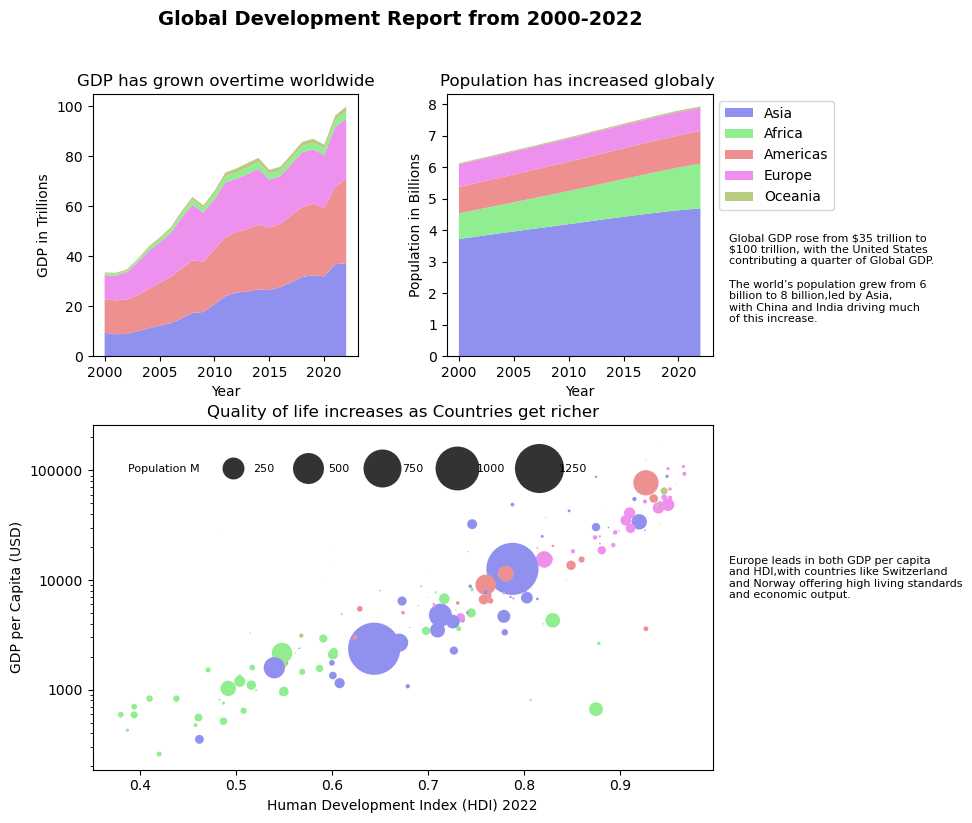

In [518]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Creating figure with

fig = plt.figure(figsize=(8, 12))

# Creating a GridSpec with 12 rows and 6 columns

gs = gridspec.GridSpec(nrows=12, ncols=6)


# adding custom colors

color_stack_one = ['#9090EE','#EE9090', '#EE90EE','#90EE90', '#BACC81']
color_stack_two = ['#9090EE','#90EE90','#EE9090','#EE90EE', '#BACC81']
color_stack_three = ['#EE90EE', '#9090EE','#BACC81', '#EE9090', '#90EE90']


#adding report title

fig.suptitle (
    "Global Development Report from 2000-2022",
   fontsize=14,
    fontweight="bold",
    x=.51,
    y=.95
   
)

# Adding subplots

ax1 = fig.add_subplot(gs[0:4, 0:3])
ax1.stackplot(
    gdp_pivot.index,  
    [gdp_pivot[region]/1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending= False).index],  
    labels = gdp_pivot.iloc[-1].sort_values(ascending= False).index,
    colors = color_stack_one
)


ax1.set_title('Stackplot of GDP by Region')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP in Trillions')
ax1.set_title("GDP has grown overtime worldwide")

fig.text(.92, .68,
         '''
Global GDP rose from $35 trillion to
$100 trillion, with the United States 
contributing a quarter of Global GDP.

The world’s population grew from 6 
billion to 8 billion,led by Asia, 
with China and India driving much
of this increase.
'''
, fontsize =8
)


ax2 = fig.add_subplot(gs[0:4, 3:10])
ax2.stackplot(
    population_pivot.index,  
    [population_pivot[region]/1_000 for region in population_pivot.iloc[-1].sort_values(ascending= False).index],  
    labels = population_pivot.iloc[-1].sort_values(ascending= False).index,
    colors = color_stack_two
)

ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('Stackplot of Population by Region')
ax2.set_xlabel('Year')
ax2.set_ylabel('Population in Billions')
ax2.set_title("Population has increased globaly ")


ax3 = fig.add_subplot(gs[4:9, :])
maxsize = max(hdi_by_region_2022['Population M'])
minsize = min(hdi_by_region_2022['Population M'])

sns.scatterplot(
    data = hdi_by_region_2022,
    x='Human Development Index (HDI) 2022',
    y='GDP per Capita (USD)',
    size = 'Population M',
    sizes= (minsize,maxsize),
    hue = 'region',
    palette = color_stack_three,
    ax = ax3
  ).set(title = "Quality of life increases as Countries get richer", yscale="log")
ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())




#removing the region labels to make space

handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(hdi_by_region_2022['region'].unique())+1
ax3.legend(handles[entries_to_skip:], labels[entries_to_skip:], bbox_to_anchor =(0, .9), loc =2, borderaxespad=0., frameon=False, 
          ncol=6, fontsize=8)
fig.text(.92, .45,
         '''
Europe leads in both GDP per capita
and HDI,with countries like Switzerland 
and Norway offering high living standards
and economic output.
'''
, fontsize =8
)


fig.subplots_adjust(wspace = 3, hspace=5)




In [519]:
fig.savefig('global_development_report_2000_2022.png', bbox_inches='tight')